In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
UCF_DIR = '/Users/baroc/repos/VideoDetection/UCF101/' #'./''
filelist = os.listdir(UCF_DIR)
np.set_printoptions(precision=4)

In [2]:
len_by_frame = np.zeros(len(filelist))
fps_nparr = np.zeros(len(filelist))
len_by_sec = np.zeros(len(filelist))

In [3]:
vidLengthFileName = UCF_DIR+"lengthOfVideos.npy"# This file contains the length of videos, so only need to compute it one time
if not os.path.isfile(vidLengthFileName):
    print 'file does not exists'
    i = 0
    for filename in filelist:
        if filename.endswith(".avi"): 
            cap = cv2.VideoCapture(UCF_DIR + filename)
            fps = cap.get(cv2.cv.CV_CAP_PROP_FPS)
            nframes = (cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))# They are integers, in frames
            len_by_frame[i] = nframes
            fps_nparr[i] = fps
            # print fps
            len_by_sec[i] = (nframes/fps) # in seconds
            i += 1
            # print("%4.8f" % (nframes/fps))
            # if fps == 25.0 or fps == temp:
            # 	continue
            # else:
            # 	print(fps)
        else:
            print('*** : '+filename)
#         os.makedirs(os.path.dirname(vidLengthFileName))
    with open(vidLengthFileName,'w') as f:
        np.save(f, [len_by_frame, len_by_sec, fps_nparr])
else:
    with open(vidLengthFileName) as f:
        [len_by_frame, len_by_sec, fps_nparr] = np.load(f)
        print 'File exists'
        print len_by_frame

File exists
[ 164.  123.  259. ...,  201.  200.  196.]


In [4]:
# with open(UCF_DIR+'length of videos') as len_by_frame_file:
#     np.save(len_by_frame_file, len_by_frame)
vidLengthFileName = (UCF_DIR+"lengthOfVideos.npy")
print vidLengthFileName
# os.makedirs(os.path.dirname(vidLengthFileName))
with open(vidLengthFileName,'w') as f:
    np.save(f, [len_by_frame, len_by_sec, fps_nparr])

/Users/baroc/repos/VideoDetection/UCF101/lengthOfVideos.npy


In [5]:
print np.min(len_by_sec)
print np.max(len_by_sec)
print np.mean(len_by_sec)
print np.median(len_by_sec)
print np.std(len_by_sec)

1.06666666667
71.04
7.2053465966
6.48
3.75795650803


In [6]:
print np.min(len_by_frame)
print np.max(len_by_frame)
print np.mean(len_by_frame)
print np.median(len_by_frame)
print np.std(len_by_frame)

29.0
1776.0
186.528562849
167.0
97.7848059441


max length: 1776 frames   71.04seconds
min length: 29 frames   1.06666666667s
mean: 186.528562849 frames   7.2053465966s
median: 167 frames   6.48s
std: 97.7848059441 frame   3.75795650803s

In [7]:
# hist = np.histogram(len_by_frame,bins = xrange(29,1777))
# print hist

# print len(hist[1])
# print len(hist[0])
# plt.plot(hist[1][:-1],hist[0])
# plt.show()

In [8]:
def drawHistOfVideoLen(len_array,length_by_frame = True):

    # the histogram of the data
    min = np.min(len_array)
    max = np.max(len_array)
    mean = np.mean(len_array)
    median = np.median(len_array)
    left = (int)(math.floor(min))
    right = (int)(math.ceil(max))+1
    xlabel = 'Length by second'
    histBins = xrange(left, right+1)#[x / 10.0 for x in range(5, 50, 15)]
    if length_by_frame:
        xlabel = 'Length by frame'
        histBins = xrange(left ,right);
    n, bins, patches = plt.hist(len_array, bins= histBins, color='g')#,log=True)
    #, 50, normed=1, facecolor='green', alpha=0.75)
    # # add a 'best fit' line
    # y = mlab.normpdf( bins, mu, sigma)
    # l = plt.plot(bins, y, 'r--', linewidth=1)
    # 

    plt.title("Distribution of videos' "+xlabel)
    plt.ylabel('Number of Videos')
    plt.xlabel(xlabel)
    # plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
    # plt.axis([0, 1800, 0, 10])
    lmean = plt.axvline(x=np.mean(len_array),color = 'r', linewidth=1.5)
    lmid = plt.axvline(x=np.median(len_array),color = 'b', linewidth=1.5)
    plt.grid(True)
    legend = plt.figlegend( (lmean, lmid),
               ('Mean', 'Median'),
               'upper right')
    plt.show()

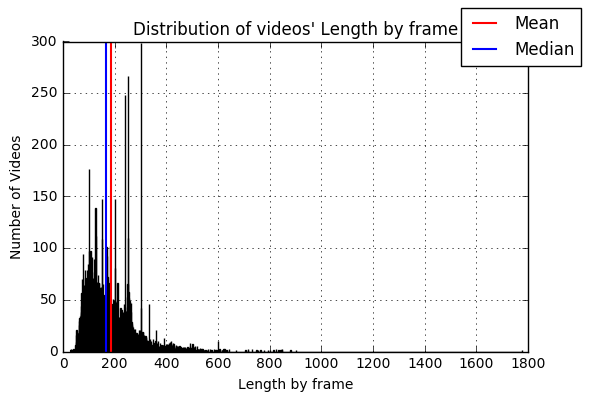

In [9]:
drawHistOfVideoLen(len_by_frame)

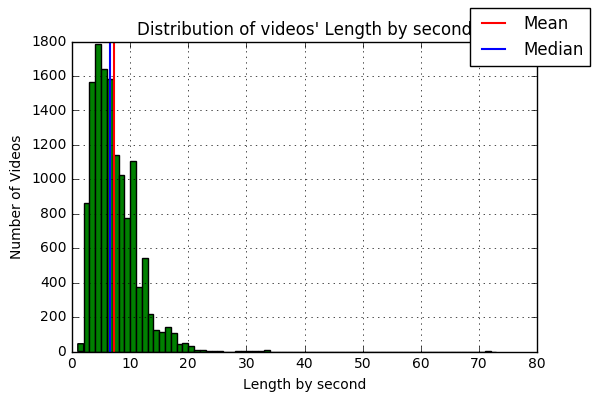

In [10]:
drawHistOfVideoLen(len_by_sec,False)

In [ ]:
# hist

In [ ]:
len_by_frame[0:10]

In [ ]:
np.where(len_by_frame == 29.0)


In [ ]:
print filelist[11381]
print filelist[9556]